# 0    Assumptions

#### 1: Houses in the city will be more expensive in comparison to houses in the countryside

#### 2: Big houses will be more expensive than smaller houses(both in the city and countryside)

#### 3: Applying the wishes of stakeholder (aprox. 2 bedrooms, good condition, splitting city/countryside and big/small, no renovation in the countryside house) will be possible 

#### 4: Big house in the city + big house in the countryside will be most expensive combination

#### 5: Bathrooms and the condition will have an impact on the price

# 1    First overview of the data

In [36]:
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import folium
from folium.plugins import HeatMap
import sklearn
from sklearn.model_selection import train_test_split

In [37]:
# read the original file
df = pd.read_csv("King_County_house_prices_dataset.csv")

# handling bathrooms
df["bathrooms"] = df["bathrooms"].apply(lambda x: round(x))

# convert variables
# following variables are in thousand dollars and sqft
df["price"] = df["price"].apply(lambda x: x*0.001)
df["sqft_lot"] = df["sqft_lot"].apply(lambda x: x*0.001)
df["sqft_living"] = df["sqft_living"].apply(lambda x: x*0.001)
df["sqft_above"] = df["sqft_above"].apply(lambda x: x*0.001)
df["sqft_living15"] = df["sqft_living15"].apply(lambda x: x*0.001)
df["sqft_lot15"] = df["sqft_lot15"].apply(lambda x: x*0.001)

df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')
df["sqft_basement"] = df["sqft_basement"].apply(lambda x: x*0.001)

# df for LinReg
df2 = df.copy()

df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221.9,3,1,1.18,5.650,1.0,NaN,0.0,...,7,1.18,0.00,1955,0.0,98178,47.5112,-122.257,1.34,5.650
1,6414100192,12/9/2014,538.0,3,2,2.57,7.242,2.0,0.0,0.0,...,7,2.17,0.40,1951,1991.0,98125,47.7210,-122.319,1.69,7.639
2,5631500400,2/25/2015,180.0,2,1,0.77,10.000,1.0,0.0,0.0,...,6,0.77,0.00,1933,NaN,98028,47.7379,-122.233,2.72,8.062
3,2487200875,12/9/2014,604.0,4,3,1.96,5.000,1.0,0.0,0.0,...,7,1.05,0.91,1965,0.0,98136,47.5208,-122.393,1.36,5.000
4,1954400510,2/18/2015,510.0,3,2,1.68,8.080,1.0,0.0,0.0,...,8,1.68,0.00,1987,0.0,98074,47.6168,-122.045,1.80,7.503


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  int64  
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 1.1      Missing values

In [39]:
# check, how many nan values are in the data set

In [40]:
print("count of missing values:")
print("view:\t\t ", df.query("view == 'nan'").id.count())
print("waterfront:\t ", df.query("waterfront == 'nan'").id.count())
print("yr_renovated:\t ",df.query("yr_renovated == 'nan'").id.count())

count of missing values:
view:		  63
waterfront:	  2376
yr_renovated:	  3842


## 1.2      Outliers

no general rule was applied, every column was inspected individually

In [41]:
df = df.query("bedrooms < 33")

In [42]:
df = df.query("price < 1970.0")
print(df['price'].skew())

1.7334911526782086


In [43]:
df = df.query("sqft_lot < 107.157")
print(df['sqft_lot'].skew())

4.032033264450194


In [44]:
df = df.query("sqft_lot15 < 96.34557399999838")
print(df['sqft_lot15'].skew())

4.027076171545066


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20854 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20854 non-null  int64  
 1   date           20854 non-null  object 
 2   price          20854 non-null  float64
 3   bedrooms       20854 non-null  int64  
 4   bathrooms      20854 non-null  int64  
 5   sqft_living    20854 non-null  float64
 6   sqft_lot       20854 non-null  float64
 7   floors         20854 non-null  float64
 8   waterfront     18554 non-null  float64
 9   view           20794 non-null  float64
 10  condition      20854 non-null  int64  
 11  grade          20854 non-null  int64  
 12  sqft_above     20854 non-null  float64
 13  sqft_basement  20417 non-null  float64
 14  yr_built       20854 non-null  int64  
 15  yr_renovated   17123 non-null  float64
 16  zipcode        20854 non-null  int64  
 17  lat            20854 non-null  float64
 18  long  

## 1.3      Distribution of price

count    20854.000000
mean       515.316288
std        282.849812
min         78.000000
25%        319.950000
50%        447.000000
75%        630.400000
max       1960.000000
Name: price, dtype: float64

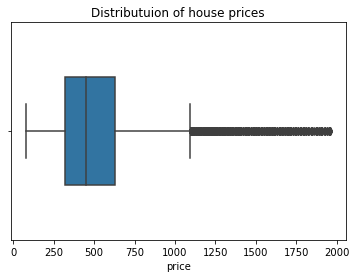

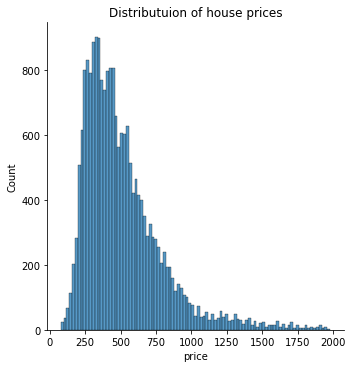

In [46]:
sns.boxplot( x=df["price"], width=0.5).set_title('Distributuion of house prices');
sns.displot(df, x=df["price"], bins=100, binwidth=20);
plt.title("Distributuion of house prices")
df.price.describe()

# 1.4      Correlations

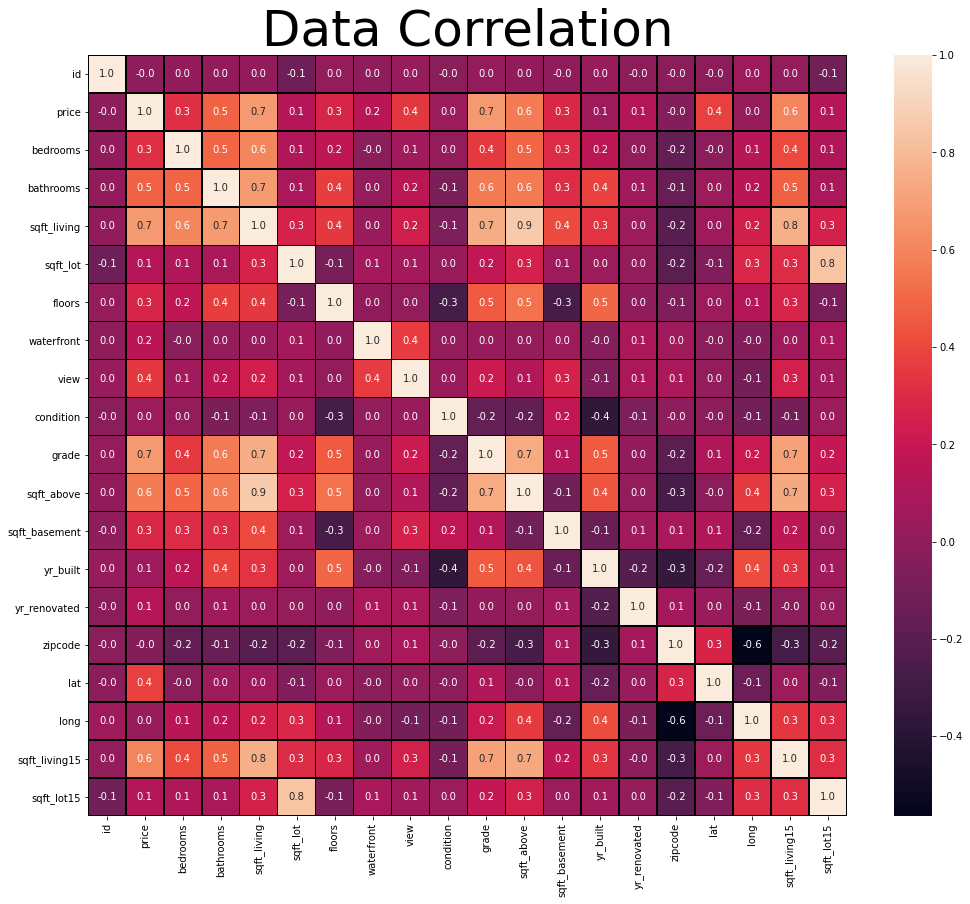

In [47]:
plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

count    20854.000000
mean         2.033205
std          0.841666
min          0.370000
25%          1.410000
50%          1.890000
75%          2.500000
max          7.620000
Name: sqft_living, dtype: float64

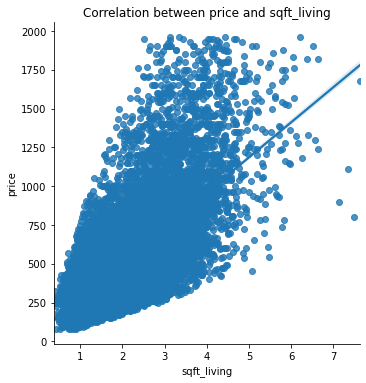

In [48]:
warnings.filterwarnings('ignore')

sns.lmplot('sqft_living', 'price',data=df);
plt.title("Correlation between price and sqft_living")
df.sqft_living.describe()

there seems to be a correlation!

count    20854.000000
mean         2.033205
std          0.841666
min          0.370000
25%          1.410000
50%          1.890000
75%          2.500000
max          7.620000
Name: sqft_living, dtype: float64

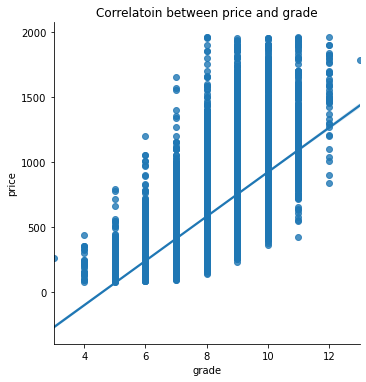

In [49]:
warnings.filterwarnings('ignore')

sns.lmplot('grade', 'price',data=df);
plt.title("Correlatoin between price and grade")
df.sqft_living.describe()

# 2    Split the data in a city and nature dataframe

In [50]:
from bokeh.plotting import figure, output_notebook, show, output_file
from bokeh.tile_providers import get_provider, Vendors

# file to save the model  
#output_file("kcmap.html")  
output_notebook()
# instantiating the figure object  
graph = figure(title = "Map of House Sales in King County", x_axis_type="mercator", y_axis_type="mercator")
#tile provider
#tile_provider = get_provider(OSM)
#graph.add_tile(tile_provider)
# name of the x-axis  
graph.xaxis.axis_label = "Long"
# name of the y-axis  
graph.yaxis.axis_label = "Lat"
# points to be plotted converted to mercator
k = 6378137
x = df.long.apply(lambda x: x * (k * np.pi/180.0))
y = df.lat.apply(lambda x: np.log(np.tan((90 + x) * np.pi/360.0)) * k)
size = 2
# plotting the graph  
graph.scatter(x, y, 
              fill_alpha=0.1,
              size = size)  
# displaying the model  
show(graph)

Loading BokehJS ...

## 2.1      Countryside

In [51]:
df_nature = df.query("long >= -122.1")
df_nature.shape

(4045, 21)

### 2.1.1        Inspecting the realtionship of house prices and variables in the countryside

count    4045.000000
mean      526.570874
std       233.488396
min        80.000000
25%       344.000000
50%       491.500000
75%       665.000000
max      1900.000000
Name: price, dtype: float64

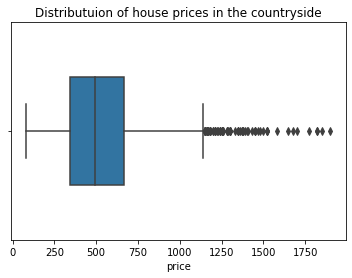

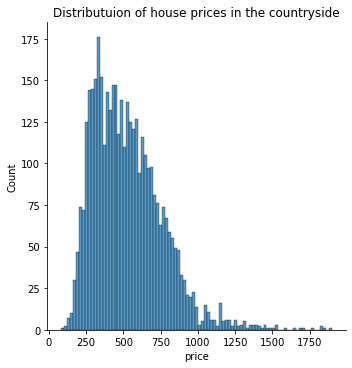

In [92]:
sns.boxplot( x=df_nature["price"], width=0.5).set_title('Distributuion of house prices in the countryside');
sns.displot(df_nature, x=df_nature["price"], bins=100, binwidth=20);
plt.title("Distributuion of house prices in the countryside")
df_nature.price.describe()

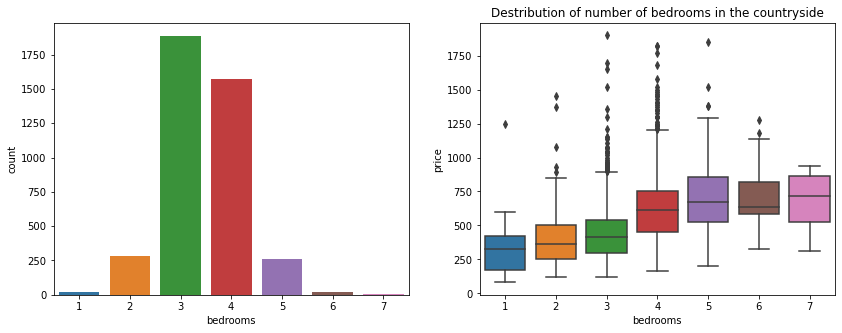

Text(0.5, 1.0, 'Scatter plot')

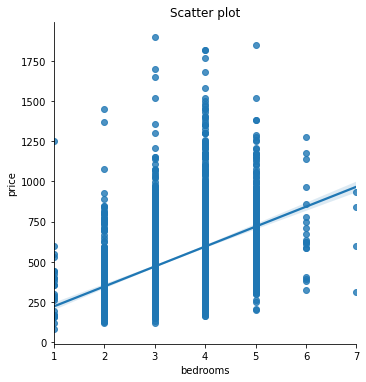

In [53]:
warnings.filterwarnings('ignore')

bedrooms = df_nature["bedrooms"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))

sns.countplot(x='bedrooms', data=df_nature, ax=ax[0])
plt.title("Destribution of number of bedrooms in the countryside")
sns.boxplot(x='bedrooms', y= 'price',
            data=df_nature, ax=ax[1])

plt.show()


sns.lmplot('bedrooms', 'price',data=df_nature);
plt.title("Scatter plot")

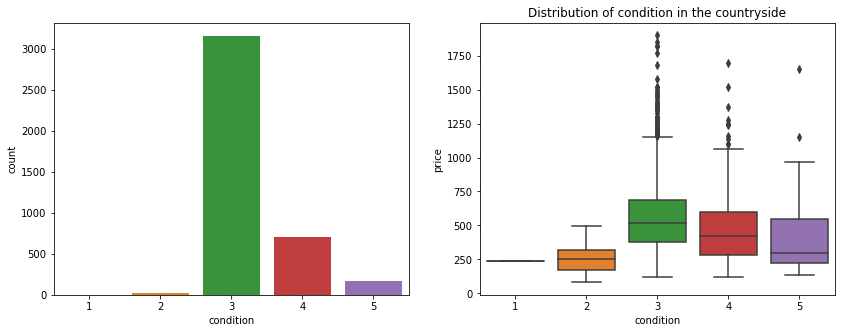

Text(0.5, 1.0, 'Scatter plot')

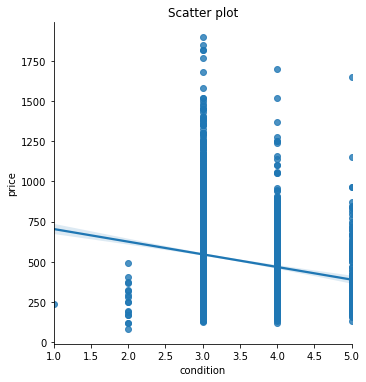

In [54]:
warnings.filterwarnings('ignore')

condition = df_nature["condition"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='condition', data=df_nature, ax=ax[0])
plt.title("Distribution of condition in the countryside")
sns.boxplot(x='condition', y= 'price',
            data=df_nature, ax=ax[1])
plt.show()

sns.lmplot('condition', 'price',data=df_nature);
plt.title("Scatter plot")

### 2.1.2        Add filters according to talk to stakeholder

In [132]:
df_nature = df_nature.query("bedrooms >= 2 and bedrooms <= 4 and condition >= 3 and yr_renovated == 0.0")
print(df_nature.shape)

(6404, 21)


count    4045.000000
mean      526.570874
std       233.488396
min        80.000000
25%       344.000000
50%       491.500000
75%       665.000000
max      1900.000000
Name: price, dtype: float64

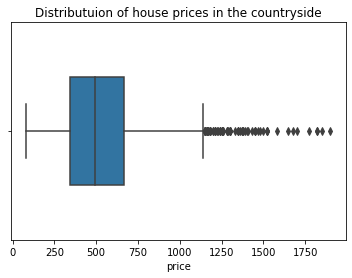

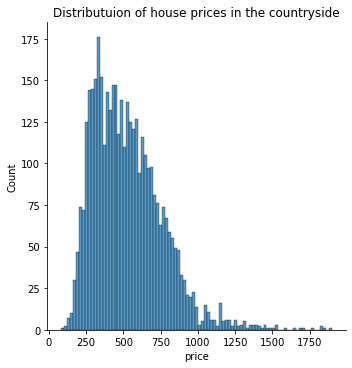

In [56]:
sns.boxplot( x=df_nature["price"], width=0.5).set_title('Distributuion of house prices in the countryside');
sns.displot(df_nature, x=df_nature["price"], bins=100, binwidth=20);
plt.title("Distributuion of house prices in the countryside")
df_nature.price.describe()

 no major changes in price distribution after apllying filters

### 2.1.3        Map of houses in the countryside

In [57]:
# Visualizing the surrounding 
maxpr=df_nature.loc[df_nature['price'].idxmax()]
#print(maxpr)
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_nature_copy = df_nature.copy()
df_nature_copy['count'] = 1
basemap = generateBaseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_nature_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

## 2.2       City

In [58]:
df_city = df.query("long < -122.1")
df_city.shape
#df_city.long.describe()

(16809, 21)

count    16809.000000
mean       512.607930
std        293.433411
min         78.000000
25%        313.000000
50%        437.500000
75%        620.000000
max       1960.000000
Name: price, dtype: float64

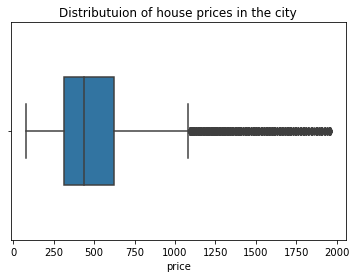

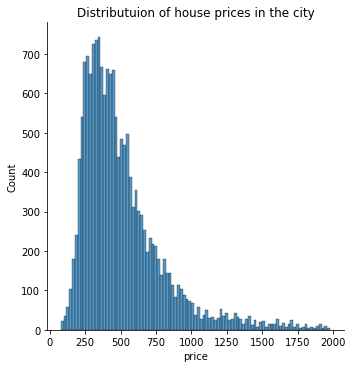

In [60]:
sns.boxplot( x=df_city["price"], width=0.5).set_title('Distributuion of house prices in the city');
sns.displot(df_city, x=df_city["price"], bins=100, binwidth=20);
plt.title("Distributuion of house prices in the city")
df_city.price.describe()

mean, median and distribution have similarities with countryside , lower median in the city (437 vs 491). More outliers here

### 2.2.1        Inspecting the realtionship of house prices and variables in the city

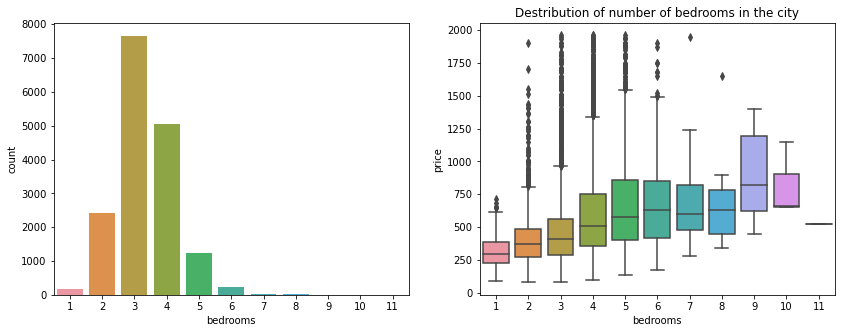

Text(0.5, 1.0, 'Scatter plot')

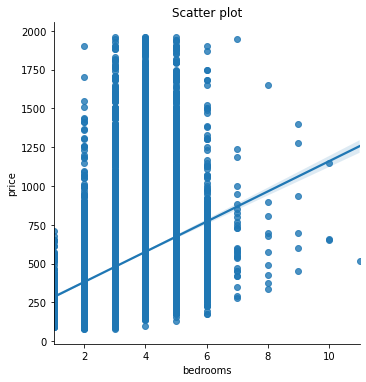

In [61]:
warnings.filterwarnings('ignore')

bedrooms = df_city["bedrooms"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))

sns.countplot(x='bedrooms', data=df_city, ax=ax[0])
plt.title("Destribution of number of bedrooms in the city")
sns.boxplot(x='bedrooms', y= 'price',
            data=df_city, ax=ax[1])

plt.show()


sns.lmplot('bedrooms', 'price',data=df_city);
plt.title("Scatter plot")

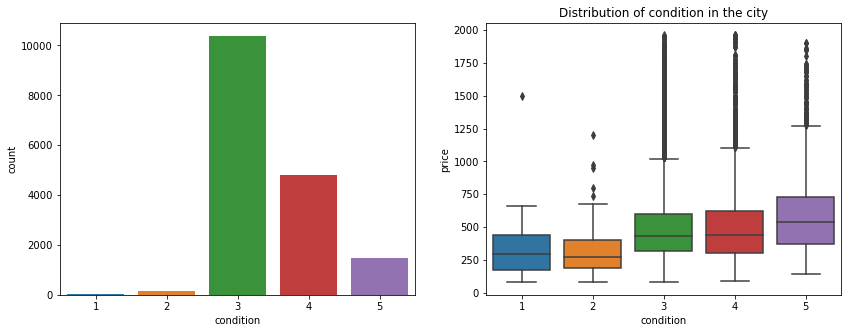

Text(0.5, 1.0, 'Scatter plot')

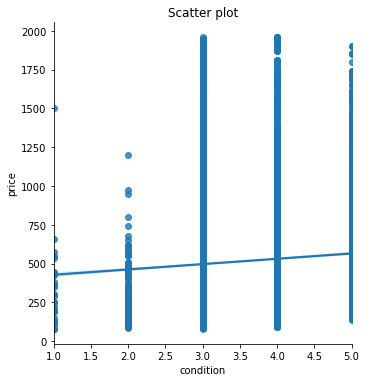

In [62]:
warnings.filterwarnings('ignore')

condition = df_city["condition"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='condition', data=df_city, ax=ax[0])
plt.title("Distribution of condition in the city")
sns.boxplot(x='condition', y= 'price',
            data=df_city, ax=ax[1])
plt.show()

sns.lmplot('condition', 'price',data=df_city);
plt.title("Scatter plot")

### 2.2.2        Add filters according to talk to stakeholder

In [63]:
df_city = df_city.query("bedrooms >= 2 and bedrooms <= 4 and condition >= 3")
df_city.shape

(14968, 21)

count    14968.000000
mean       498.096962
std        277.335349
min         82.000000
25%        309.945750
50%        430.000000
75%        600.000000
max       1960.000000
Name: price, dtype: float64

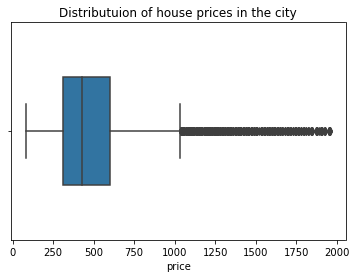

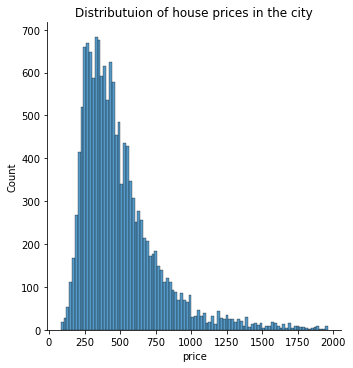

In [64]:
sns.boxplot( x=df_city["price"], width=0.5).set_title('Distributuion of house prices in the city');
sns.displot(df_city, x=df_city["price"], bins=100, binwidth=20);
plt.title("Distributuion of house prices in the city")
df_city.price.describe()

 median and mean decreased slightly

### 2.2.3        Map of houses in the city

In [65]:
# Visualizing the surrounding 
maxpr=df_city.loc[df_city['price'].idxmax()]

def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_city_copy = df_city.copy()
df_city_copy['count'] = 1
basemap = generateBaseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_city_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

## 3    Splitting into big and small houses

## 3.1      Countryside

Small

In [66]:
df_nature_small = df_nature.query("sqft_living <= sqft_living.median()")
df_nature_small.shape

(2033, 21)

Big

In [67]:
df_nature_big = df_nature.query("sqft_living > sqft_living.median()")
df_nature_big.shape

(2012, 21)

## 3.2      City

 Small

In [68]:
df_city_small = df_city.query("sqft_living <= sqft_living.median()")
df_city_small.shape

(7496, 21)

 Big

In [69]:
df_city_big = df_city.query("sqft_living > sqft_living.median()")
df_city_big.shape

(7472, 21)

## 3.3      Comparison

In [77]:
print("city small:\t\t ", round(df_city_small.price.mean()), round(df_city_small.price.median()))
print("countryside small:\t ", round(df_nature_small.price.mean()), round(df_nature_small.price.median()))
print("")
print("city big:\t\t ", round(df_city_big.price.mean()), round(df_city_big.price.median()))
print("countryside big:\t ", round(df_nature_big.price.mean()), round(df_nature_big.price.median()))

city small:		  379 355
countryside small:	  380 355

city big:		  618 542
countryside big:	  675 658


in comparison to big houses in the countryside(mean=675, median=658, ),  big houses in the city tend to be cheaper

count    14968.000000
mean         1.885559
std          0.743429
min          0.440000
25%          1.340000
50%          1.760000
75%          2.290000
max          7.620000
Name: sqft_living, dtype: float64

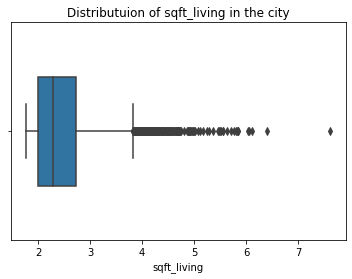

In [89]:
sns.boxplot( x=df_city_big["sqft_living"], width=0.5).set_title('Distributuion of sqft_living in the city');
plt.title("Distributuion of sqft_living in the city")
df_city.sqft_living.describe()

count    14968.000000
mean         1.885559
std          0.743429
min          0.440000
25%          1.340000
50%          1.760000
75%          2.290000
max          7.620000
Name: sqft_living, dtype: float64

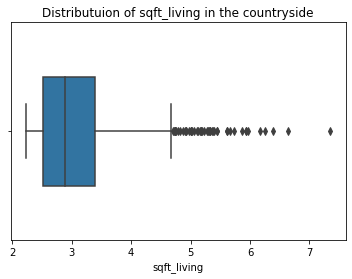

In [90]:
sns.boxplot( x=df_nature_big["sqft_living"], width=0.5).set_title('Distributuion of sqft_living in the countryside');
plt.title("Distributuion of sqft_living in the countryside")
df_city.sqft_living.describe()

Possible explanation: Big houses in the countryside have higher values for sqft_living in avergae and therefore they are more expensive than big houses in the countryside

## 3.4      Join the tables

 small_city and small_countryside

In [71]:
df_city_small['key'] = 1
df_nature_small['key'] = 1

result_cs_ns = pd.merge(df_city_small, df_nature_small, on ='key', suffixes=("_city", "_nature")).drop("key", 1) 

In [73]:
result_cs_ns["price"] = result_cs_ns["price_city"] + result_cs_ns["price_nature"]

 big_city and small_countryside

In [74]:
df_city_big['key'] = 1
df_nature_small['key'] = 1

result_cb_ns = pd.merge(df_city_big, df_nature_small, on ='key', suffixes=("_city", "_nature")).drop("key", 1)
result_cb_ns["price"] = result_cb_ns["price_city"] + result_cb_ns["price_nature"]

 small_city and big_countryside

In [75]:
df_city_small['key'] = 1
df_nature_big['key'] = 1

result_cs_nb = pd.merge(df_city_small, df_nature_big, on ='key', suffixes=("_city", "_nature")).drop("key", 1)
result_cs_nb["price"] = result_cs_nb["price_city"] + result_cs_nb["price_nature"]

 big_city and big_countryside

In [78]:
df_city_big['key'] = 1
df_nature_big['key'] = 1

result_cb_nb = pd.merge(df_city_big, df_nature_big, on ='key', suffixes=("_city", "_nature")).drop("key", 1)
result_cb_nb["price"] = result_cb_nb["price_city"] + result_cb_nb["price_nature"]

In [80]:
print("city:small and nature:small")
print("median: ", round(result_cs_ns.price.median()), "mean: ", round(result_cs_ns.price.mean()) )
print("")
print("city:big and nature:small")
print("median: ", round(result_cb_ns.price.median()), "mean: ", round(result_cb_ns.price.mean()) )
print("")
print("city:small and nature:big")
print("median: ", round(result_cs_nb.price.median()), "mean: ", round(result_cs_nb.price.mean()) )
print("")
print("city:big and nature:big")
print("median: ", round(result_cb_nb.price.median()), "mean: ", round(result_cb_nb.price.mean()) )

city:small and nature:small
median:  740 mean:  759

city:big and nature:small
median:  931 mean:  998

city:small and nature:big
median:  1029 mean:  1053

city:big and nature:big
median:  1226 mean:  1293


# 4    Timing for buying a house in the countryside

In [81]:
df_nature_copy = df_nature.copy()

In [82]:
df_nature_copy["month"] = df_nature_copy["date"].apply(lambda x: x[0:2] if len(x) == 10 else x[0:1] )

In [83]:
pd.pivot_table(df_nature_copy, values="price", columns="month")

month,1,10,11,12,2,3,4,5,6,7,8,9
price,518.917703,497.576029,496.531532,520.985105,499.585983,521.379578,555.634068,524.579448,541.213861,541.869899,530.560016,521.833974


In [84]:
df_nature_copy.groupby("month").price.mean().sort_values()

month
11    496.531532
10    497.576029
2     499.585983
1     518.917703
12    520.985105
3     521.379578
9     521.833974
5     524.579448
8     530.560016
6     541.213861
7     541.869899
4     555.634068
Name: price, dtype: float64

# 5 First results and insights

1: Prices in the city in general tend to be lower

mean: 526.57 (countryside) vs  512 (city)

 median:    491 (countryside) vs  437 (city)
 
 

2: There is a correlation between size of living space and price. Smaller houses are cheaper. This is probably the reason for result no.1

3: No major differences between small-house prices in the city and in the countryside

4: Big houses in the countryside are more likely to be expensive than in the city (Against my assumption)

5:

    city:small and nature:small
    median:  740 mean:  759

    city:big and nature:small
    median:  931 mean:  998

    city:small and nature:big
    median:  1029 mean:  1053

    city:big and nature:big
    median:  1226 mean:  1293

6: In the wintertime, prices in the countryside tend to be lower

7: On a descriptive level, bathrooms and condition do not seem to have a big impact on the prices

# 6 Recommendations

1: If you want a big house --> buy in the city

2: If you are looking for a small house, it does not really matter if the house is located in the city or in the countryside

3: Given the fact, that you are not in a rush to buy a house in the countryside, wait with it for the winter time

4: The combination city:big and nature:small may be the best option for you

5: Be open for 3 bedrooms, otherwise your choice can be limited

# 7 Linear Regression

In [4]:
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221.900,3,1,1.18,5.650,1.0,NaN,0.0,...,7,1.18,0.00,1955,0.0,98178,47.5112,-122.257,1.34,5.650
1,6414100192,12/9/2014,538.000,3,2,2.57,7.242,2.0,0.0,0.0,...,7,2.17,0.40,1951,1991.0,98125,47.7210,-122.319,1.69,7.639
2,5631500400,2/25/2015,180.000,2,1,0.77,10.000,1.0,0.0,0.0,...,6,0.77,0.00,1933,NaN,98028,47.7379,-122.233,2.72,8.062
3,2487200875,12/9/2014,604.000,4,3,1.96,5.000,1.0,0.0,0.0,...,7,1.05,0.91,1965,0.0,98136,47.5208,-122.393,1.36,5.000
4,1954400510,2/18/2015,510.000,3,2,1.68,8.080,1.0,0.0,0.0,...,8,1.68,0.00,1987,0.0,98074,47.6168,-122.045,1.80,7.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360.000,3,2,1.53,1.131,3.0,0.0,0.0,...,8,1.53,0.00,2009,0.0,98103,47.6993,-122.346,1.53,1.509
21593,6600060120,2/23/2015,400.000,4,2,2.31,5.813,2.0,0.0,0.0,...,8,2.31,0.00,2014,0.0,98146,47.5107,-122.362,1.83,7.200
21594,1523300141,6/23/2014,402.101,2,1,1.02,1.350,2.0,0.0,0.0,...,7,1.02,0.00,2009,0.0,98144,47.5944,-122.299,1.02,2.007
21595,291310100,1/16/2015,400.000,3,2,1.60,2.388,2.0,NaN,0.0,...,8,1.60,0.00,2004,0.0,98027,47.5345,-122.069,1.41,1.287


## 7.1 Dummies

In [5]:
#print(df.waterfront.nunique())
#print(df.grade.nunique())
#print(df.condition.nunique())
#print(df.view.nunique())


#waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)
#grade_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
#condition_dummies = pd.get_dummies(df['condition'], prefix='cd', drop_first=True)
#view_dummies = pd.get_dummies(df['view'], prefix='vw', drop_first=True)
#view_dummies

In [6]:
#df = df.drop(['waterfront','grade','condition', 'view'], axis=1)

In [7]:
#df = pd.concat([df, waterfront_dummies, grade_dummies, condition_dummies, view_dummies ], axis=1)
#df.head()

## 7.2 Heatmap

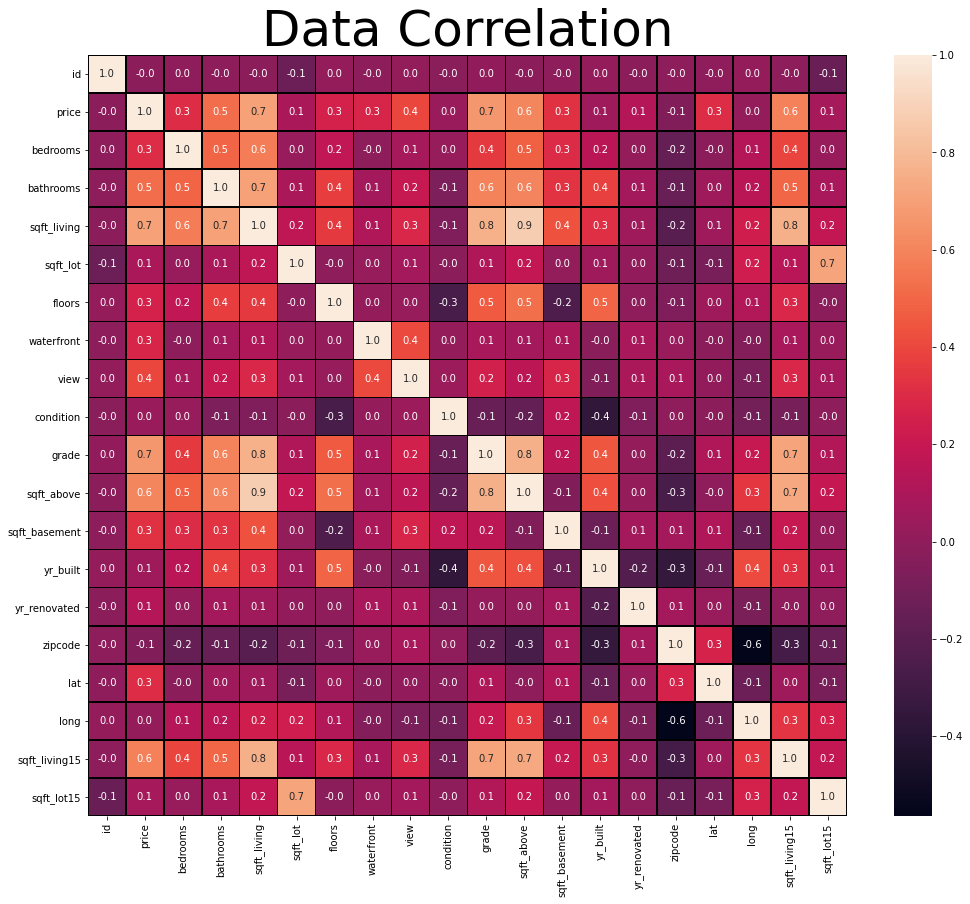

In [8]:
plt.subplots(figsize=(17,14))
sns.heatmap(df2.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

## 7.3 Explanatory variables

In [9]:
explanatory_vars = list(df2.columns)
explanatory_vars

print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=df2).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))
    
# sales predicting salesis included as explanatory variable for sanity check

R squared for each possible explanatory variable:
id      	 	= 0.000281
date    	 	= 0.0198
price   	 	= 1.0
bedrooms 	 	= 0.0953
bathrooms 	 	= 0.27
sqft_living 	 	= 0.493
sqft_lot 	 	= 0.00808
floors  	 	= 0.0659
waterfront 	 	= 0.0763
view    	 	= 0.157
condition 	 	= 0.0013
grade   	 	= 0.446
sqft_above 	 	= 0.366
sqft_basement 	 	= 0.106
yr_built 	 	= 0.00291
yr_renovated 	 	= 0.0168
zipcode 	 	= 0.00285
lat     	 	= 0.0941
long    	 	= 0.000486
sqft_living15 	 	= 0.343
sqft_lot15 	 	= 0.00686


In [10]:
df2.shape

(21597, 21)

## 7.4 Split the data set

In [11]:
# dropna because otherwise an errormesssage came up
#df2 = df2.dropna()

In [12]:
x = df2
y = df2.price

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)
xTrain.shape

(17277, 21)

## 7. 5 Outliers

In [13]:
xTrain = xTrain.query("bedrooms < 33")
xTrain = xTrain.query("price < 1970.0")
xTrain = xTrain.query("sqft_lot < 107.157")
xTrain = xTrain.query("sqft_lot15 < 96.34557399999838")

yTrain = xTrain.price

print(xTrain.shape)
print(yTrain.shape)

(16661, 21)
(16661,)


## 7.6 Training the model

In [220]:
#model1 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living + sqft_lot + floors +  sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + waterfront + view + grade+ condition', data=xTrain).fit()
#model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1761.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:17:11   Log-Likelihood:                -76673.
No. Observations:               11917   AIC:                         1.534e+05
Df Residuals:                   11899   BIC:                         1.535e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3860.4562   2973.638      1.298      0.194   -1968.360    9689.273
bedrooms        -21.3748      2.031    -10.526      0.000     -25.355     -17.394
bathrooms        34.5622      2.804     12.324      0.000      29.065      40.059
sqft_living      70.8820      2.416     29.341      0.000      66.147      75.617
sqft_lot          0.0682      0.229      0.299      0.765      -0.380       0.516
floors           26.1946      3.622      7.232      0.000      19.095      33.294
sqft_above       42.1598      2.404     17.534      0.000      37.447      46.873
sqft_basement    28.7222      2.718     10.568      0.000      23.395      34.050
yr_built         -2.1904      0.071    -30.865      0.000      -2.329      -2.051
yr_renovated      0.0268      0.004      7.255      0.000       0.020       0.034
zipcode          -0.4238      0.033    -12.746      0.000      -0.489      -0.359
lat             590.8671     10.851     54.453      0.000     569.597     612.137
long           -108.8066     13.646     -7.973      0.000    -135.556     -82.058
sqft_living15    51.9814      3.684     14.108      0.000      44.759      59.204
sqft_lot15       -1.4244      0.277     -5.140      0.000      -1.968      -0.881
waterfront      293.0326     21.250     13.789      0.000     251.378     334.687
view             46.9509      2.264     20.741      0.000      42.514      51.388
grade            88.1098      2.221     39.673      0.000      83.756      92.463
condition        29.4127      2.373     12.395      0.000      24.761      34.064
==============================================================================
Omnibus:                     3504.317   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19179.882
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                       8.640   Cond. No.                     6.29e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.9e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

remove sqft_lot

In [221]:
#model2 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + +floors + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + waterfront + view + grade+ condition', data=xTrain).fit()

#model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1871.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:17:38   Log-Likelihood:                -76673.
No. Observations:               11917   AIC:                         1.534e+05
Df Residuals:                   11900   BIC:                         1.535e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3904.9452   2969.787      1.315      0.189   -1916.323    9726.213
bedrooms        -21.3921      2.030    -10.539      0.000     -25.371     -17.413
bathrooms        34.5531      2.804     12.322      0.000      29.056      40.050
sqft_living      70.9388      2.408     29.457      0.000      66.218      75.659
floors           26.1345      3.616      7.227      0.000      19.046      33.223
sqft_above       42.2001      2.401     17.579      0.000      37.495      46.906
sqft_basement    28.7387      2.717     10.576      0.000      23.412      34.065
yr_built         -2.1913      0.071    -30.905      0.000      -2.330      -2.052
yr_renovated      0.0267      0.004      7.252      0.000       0.020       0.034
zipcode          -0.4240      0.033    -12.753      0.000      -0.489      -0.359
lat             590.7890     10.847     54.464      0.000     569.526     612.052
long           -108.6130     13.630     -7.968      0.000    -135.331     -81.895
sqft_living15    51.9646      3.684     14.106      0.000      44.744      59.186
sqft_lot15       -1.3584      0.167     -8.131      0.000      -1.686      -1.031
waterfront      292.9813     21.249     13.788      0.000     251.330     334.633
view             46.9581      2.263     20.746      0.000      42.521      51.395
grade            88.1026      2.221     39.673      0.000      83.750      92.456
condition        29.3853      2.371     12.393      0.000      24.738      34.033
==============================================================================
Omnibus:                     3503.667   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19162.360
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                       8.637   Cond. No.                     5.87e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.32e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### remove sqft_above and sqft_living15 beacause of multicollinearity

In [222]:
#model3 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + sqft_basement + yr_built + yr_renovated + zipcode + lat + long  + sqft_lot15 + waterfront + view + grade+ condition', data=xTrain).fit()
#model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2082.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:18:11   Log-Likelihood:                -76788.
No. Observations:               11917   AIC:                         1.536e+05
Df Residuals:                   11902   BIC:                         1.537e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8106.8016   2901.338      2.794      0.005    2419.705    1.38e+04
bedrooms        -22.3134      2.048    -10.895      0.000     -26.328     -18.299
bathrooms        34.4067      2.804     12.269      0.000      28.910      39.904
sqft_living     141.9047      3.520     40.317      0.000     135.005     148.804
sqft_basement   -33.9669      4.062     -8.363      0.000     -41.929     -26.005
yr_built         -2.1219      0.069    -30.949      0.000      -2.256      -1.988
yr_renovated      0.0246      0.004      6.628      0.000       0.017       0.032
zipcode          -0.4492      0.033    -13.521      0.000      -0.514      -0.384
lat             602.3839     10.907     55.232      0.000     581.005     623.762
long            -89.0574     13.601     -6.548      0.000    -115.718     -62.396
sqft_lot15       -1.3023      0.164     -7.923      0.000      -1.625      -0.980
waterfront      292.8120     21.439     13.658      0.000     250.788     334.836
view             51.9283      2.257     23.011      0.000      47.505      56.352
grade            98.1300      2.139     45.874      0.000      93.937     102.323
condition        26.9247      2.388     11.274      0.000      22.244      31.606
==============================================================================
Omnibus:                     3380.216   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17816.027
Skew:                           1.267   Prob(JB):                         0.00
Kurtosis:                       8.428   Cond. No.                     2.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Remove categorials

In [224]:
#model4 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living   + yr_built + yr_renovated + zipcode + lat + long  + sqft_lot15', data=xTrain).fit()
#model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2118.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:19:22   Log-Likelihood:                -78470.
No. Observations:               11917   AIC:                         1.570e+05
Df Residuals:                   11907   BIC:                         1.570e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -446.6280   3268.190     -0.137      0.891   -6852.815    5959.559
bedrooms       -45.6241      2.314    -19.714      0.000     -50.161     -41.088
bathrooms       45.7597      3.192     14.334      0.000      39.502      52.017
sqft_living    243.5172      3.000     81.174      0.000     237.637     249.398
yr_built        -1.4333      0.068    -20.933      0.000      -1.567      -1.299
yr_renovated     0.0333      0.004      7.962      0.000       0.025       0.041
zipcode         -0.5013      0.038    -13.254      0.000      -0.575      -0.427
lat            660.1218     12.285     53.733      0.000     636.041     684.203
long          -172.8262     15.299    -11.297      0.000    -202.815    -142.838
sqft_lot15      -0.5802      0.188     -3.086      0.002      -0.949      -0.212
==============================================================================
Omnibus:                     3258.387   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15465.586
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       7.989   Cond. No.                     2.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model5 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + yr_built  + zipcode + lat + long  + sqft_lot15 + grade ', data=xTrain).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     3952.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:05:29   Log-Likelihood:            -1.0816e+05
No. Observations:               16661   AIC:                         2.163e+05
Df Residuals:                   16651   BIC:                         2.164e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5997.1225   2518.343      2.381      0.017    1060.902    1.09e+04
bedrooms      -23.5984      1.786    -13.214      0.000     -27.099     -20.098
bathrooms      33.7407      2.451     13.764      0.000      28.936      38.546
sqft_living   139.7158      2.885     48.434      0.000     134.062     145.370
yr_built       -2.6264      0.054    -48.531      0.000      -2.733      -2.520
zipcode        -0.4280      0.029    -14.633      0.000      -0.485      -0.371
lat           560.5483      9.628     58.222      0.000     541.677     579.420
long         -113.7234     11.873     -9.578      0.000    -136.996     -90.450
sqft_lot15     -0.8210      0.144     -5.701      0.000      -1.103      -0.539
grade         111.7857      1.832     61.013      0.000     108.194     115.377
==============================================================================
Omnibus:                     5311.037   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29478.766
Skew:                           1.426   Prob(JB):                         0.00
Kurtosis:                       8.859   Cond. No.                     2.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 7.7  Evaluate the model

Traning set

In [15]:
#y_train_pred1 = model1.predict(xTrain)
#y_train_pred2 = model2.predict(xTrain)
#y_train_pred3 = model3.predict(xTrain)
#y_train_pred4 = model4.predict(xTrain)
y_train_pred5 = model5.predict(xTrain)

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#rmse1 = sqrt(mean_squared_error(yTrain, y_train_pred1))
#rmse2 = sqrt(mean_squared_error(yTrain, y_train_pred2))
#rmse3 = sqrt(mean_squared_error(yTrain, y_train_pred3))
#rmse4 = sqrt(mean_squared_error(yTrain, y_train_pred4))
rmse5 = sqrt(mean_squared_error(yTrain, y_train_pred5))

#statsmodels.tools.eval_measures.rmse(y_train_pred, yTrain)
#print("rmse1: ", rmse1)
#print("rmse2: ", rmse2)
#print("rmse3: ", rmse3)
#print("rmse4: ", rmse4)
print("rmse5: ", rmse5)


rmse5:  159.6701700153292


Test set

In [17]:
#y_test_pred1 = model1.predict(xTest)
#y_test_pred2 = model2.predict(xTest)
#y_test_pred3 = model3.predict(xTest)
#y_test_pred4 = model4.predict(xTest)
y_test_pred5 = model5.predict(xTest)


In [18]:
#rmse1 = sqrt(mean_squared_error(yTest, y_test_pred1))
#rmse2 = sqrt(mean_squared_error(yTest, y_test_pred2))
#rmse3 = sqrt(mean_squared_error(yTest, y_test_pred3))
#rmse4 = sqrt(mean_squared_error(yTest, y_test_pred4))
rmse5 = sqrt(mean_squared_error(yTest, y_test_pred5))

#statsmodels.tools.eval_measures.rmse(y_train_pred, yTrain)
#print("rmse1: ", rmse1)
#print("rmse2: ", rmse2)
#print("rmse3: ", rmse3)
#print("rmse4: ", rmse4)
print("rmse5: ", rmse5)


rmse5:  205.02923296327455
